In [1]:
import random
import numpy as np

### サンプルデータの前処理

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data['data'].shape, data['target'].shape

((150, 4), (150,))

In [27]:
n_class = len(np.unique(data['target']))
n_class

3

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data['data'][:, [1, 2]])

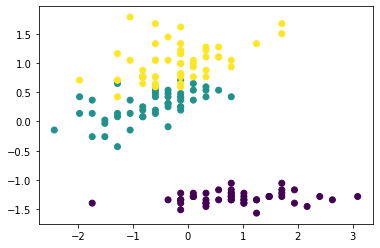

In [102]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X[:, 0], X[:, 1], c=data['target'])

In [103]:
n = len(X)

### mu の初期値を作成

In [125]:
# initialize mu_k by randomly selected data points
mu = X[random.sample(list(range(n)), n_class)]

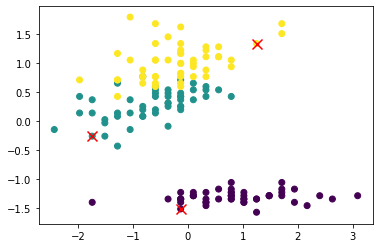

In [126]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X[:, 0], X[:, 1], c=data['target'])
plt.scatter(mu[:, 0], mu[:, 1], c='r', marker='x', s=100)

### Eステップ 負担率 rnk の計算

In [127]:
# E step calc rnk
dist_nk = np.zeros(shape=(n, n_class))
for i in range(n):
    for k in range(n_class):
        dist_nk[i, k] = np.linalg.norm(X[i] - mu[k])

In [128]:
dist_nk.shape

(150, 3)

##### μk からの距離を計算

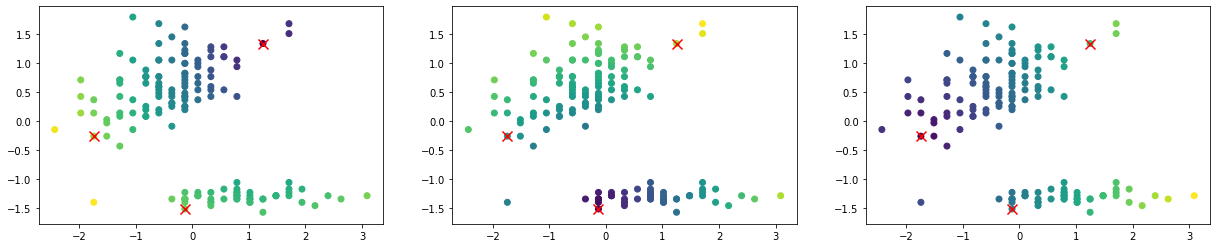

In [129]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (21, 4)
for k in range(n_class):
    plt.subplot(1, n_class, k+1)
    plt.scatter(X[:, 0], X[:, 1], c=dist_nk[:, k])
    plt.scatter(mu[:, 0], mu[:, 1], c='r', marker='x', s=100)

##### 負担率 rnk

In [130]:
rnk = np.argmin(dist_nk, axis=1)

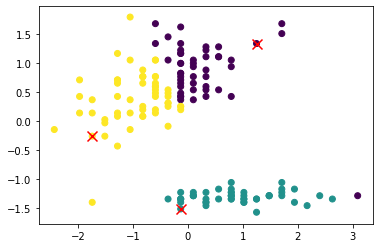

In [131]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X[:, 0], X[:, 1], c=rnk)
plt.scatter(mu[:, 0], mu[:, 1], c='r', marker='x', s=100)

In [132]:
rnk

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int64)

### Mステップ μk の計算

In [133]:
for k in range(n_class):
    mu[k] = np.sum(X[rnk==k], axis=0) / sum(rnk==k)

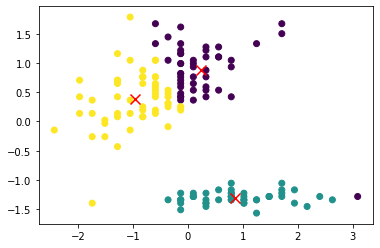

In [134]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X[:, 0], X[:, 1], c=rnk)
plt.scatter(mu[:, 0], mu[:, 1], c='r', marker='x', s=100)

### 誤差関数の計算

In [137]:
j = 0
for k in range(n_class):
    xk = X[rnk==k]
    for i in range(len(xk)):
        j += np.linalg.norm(xk-mu[k])**2
print(j)

4214.787996703842
